# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [1]:
genome_ids = ['NA18605', 'NA18573', 'NA18627', 'NA18747', 'NA18616', 'NA18596', 'NA18552', 'NA18648', 'NA18626', 'NA18619', 'NA18612', 'NA18565', 'NA18530', 'NA18570', 'NA18740', 'NA18602', 'NA18611', 'NA18577', 'NA18609', 'NA18576', 'NA18597', 'NA18610', 'NA18582', 'NA18553', 'NA18608', 'NA18592', 'NA18635', 'NA18645', 'NA18533', 'NA18574', 'NA18539', 'NA18757', 'NA18636', 'NA18638', 'NA18615', 'NA18613', 'NA18625', 'NA18591', 'NA18527', 'NA18562', 'NA18531', 'NA18542', 'NA18559', 'NA18634', 'NA18632', 'NA18528', 'NA18564', 'NA18560', 'NA18642', 'NA18534', 'NA18547', 'NA18628', 'NA18639', 'NA18557', 'NA18545', 'NA18599', 'NA18561', 'NA18532', 'NA18641', 'NA18631', 'NA18536', 'NA18550', 'NA18748', 'NA18630', 'NA18617', 'NA18546', 'NA18629', 'NA18579', 'NA18538', 'NA18593', 'NA18526', 'NA18745', 'NA18541', 'NA18548', 'NA18620', 'NA18614', 'NA18621', 'NA18623', 'NA18571', 'NA18606', 'NA18525', 'NA18637', 'NA18572', 'NA18567', 'NA18549', 'NA18624', 'NA18563', 'NA18603', 'NA18622', 'NA18555', 'NA18749', 'NA18543', 'NA18544', 'NA18537', 'NA18640', 'NA18618', 'NA18595', 'NA18633', 'NA18643', 'NA18535', 'NA18558', 'NA18647']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [3]:
root_dir = join(Path.home(),"cp_als/populations")

In [4]:
infile = join(root_dir,"output/CHB/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/CHB/all.csv'

In [5]:
df = pd.read_csv(infile)

In [6]:
df = df[genome_ids + ['gene']]
df.head()

,NA18605,NA18573,NA18627,NA18747,NA18616,NA18596,NA18552,NA18648,NA18626,NA18619,...,NA18537,NA18640,NA18618,NA18595,NA18633,NA18643,NA18535,NA18558,NA18647,gene
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
4,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,TARDBP


## Computer variant count per gene and per genome

In [7]:
sdf=df.groupby(["gene"]).sum()

In [8]:
sdf.head()

,NA18605,NA18573,NA18627,NA18747,NA18616,NA18596,NA18552,NA18648,NA18626,NA18619,...,NA18544,NA18537,NA18640,NA18618,NA18595,NA18633,NA18643,NA18535,NA18558,NA18647
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,7,20,21,24,4,2,16,8,22,2,...,23,23,3,9,6,22,3,21,5,1
ANG,0,0,5,13,1,1,6,5,0,2,...,1,0,0,5,1,0,1,0,1,1
ATXN2,7,7,5,3,3,6,9,8,7,2,...,1,6,22,4,6,1,7,9,10,4
C19ORF12,10,10,5,4,6,9,16,13,1,6,...,13,15,11,8,5,12,10,9,4,8
C9ORF72,1,34,15,23,12,9,3,10,12,13,...,13,11,35,14,4,14,22,15,11,1


## Compute mean99

In [9]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [10]:
mean99.head()

,0
NA18605,9.010101
NA18573,13.616162
NA18627,12.030303
NA18747,10.161616
NA18616,6.525253


In [11]:
m99 = mean99.transpose()

In [12]:
m99

,NA18605,NA18573,NA18627,NA18747,NA18616,NA18596,NA18552,NA18648,NA18626,NA18619,...,NA18544,NA18537,NA18640,NA18618,NA18595,NA18633,NA18643,NA18535,NA18558,NA18647
0,9.010101,13.616162,12.030303,10.161616,6.525253,7.565657,8.10101,14.060606,7.505051,7.353535,...,7.111111,6.181818,6.292929,9.181818,8.111111,8.616162,7.737374,8.727273,12.979798,11.878788


## Name the row "mean99" to append to the dataframe 

In [13]:
m99.index=["mean99"]

In [14]:
m99.head()

,NA18605,NA18573,NA18627,NA18747,NA18616,NA18596,NA18552,NA18648,NA18626,NA18619,...,NA18544,NA18537,NA18640,NA18618,NA18595,NA18633,NA18643,NA18535,NA18558,NA18647
mean99,9.010101,13.616162,12.030303,10.161616,6.525253,7.565657,8.10101,14.060606,7.505051,7.353535,...,7.111111,6.181818,6.292929,9.181818,8.111111,8.616162,7.737374,8.727273,12.979798,11.878788


## Compute statistics per genome, across all genes

In [15]:
genome_stats= sdf.describe()

In [16]:
genome_stats.head()

,NA18605,NA18573,NA18627,NA18747,NA18616,NA18596,NA18552,NA18648,NA18626,NA18619,...,NA18544,NA18537,NA18640,NA18618,NA18595,NA18633,NA18643,NA18535,NA18558,NA18647
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,24.777778,37.444444,33.083333,27.944444,17.944444,20.805556,22.277778,38.666667,20.638889,20.222222,...,19.555556,17.000000,17.305556,25.250000,22.305556,23.694444,21.277778,24.000000,35.694444,32.666667
std,86.408039,116.867799,95.508975,92.314972,38.724628,71.201051,62.838392,105.971425,45.862000,52.713301,...,66.606497,36.279865,32.621482,91.691213,83.274355,71.030705,58.797770,79.380458,123.825181,99.127335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,1.000000,1.750000,1.000000,1.000000,1.000000,2.750000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000


### Adding new rows for genomes to show variant statistics

In [17]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [18]:
genome_stats_df

,NA18605,NA18573,NA18627,NA18747,NA18616,NA18596,NA18552,NA18648,NA18626,NA18619,...,NA18544,NA18537,NA18640,NA18618,NA18595,NA18633,NA18643,NA18535,NA18558,NA18647
ALS2,7.000000,20.000000,21.000000,24.000000,4.000000,2.000000,16.000000,8.000000,22.000000,2.000000,...,23.000000,23.000000,3.000000,9.000000,6.000000,22.000000,3.000000,21.000000,5.000000,1.000000
ANG,0.000000,0.000000,5.000000,13.000000,1.000000,1.000000,6.000000,5.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,5.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
ATXN2,7.000000,7.000000,5.000000,3.000000,3.000000,6.000000,9.000000,8.000000,7.000000,2.000000,...,1.000000,6.000000,22.000000,4.000000,6.000000,1.000000,7.000000,9.000000,10.000000,4.000000
C19ORF12,10.000000,10.000000,5.000000,4.000000,6.000000,9.000000,16.000000,13.000000,1.000000,6.000000,...,13.000000,15.000000,11.000000,8.000000,5.000000,12.000000,10.000000,9.000000,4.000000,8.000000
C9ORF72,1.000000,34.000000,15.000000,23.000000,12.000000,9.000000,3.000000,10.000000,12.000000,13.000000,...,13.000000,11.000000,35.000000,14.000000,4.000000,14.000000,22.000000,15.000000,11.000000,1.000000
CHCHD10,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
CHMP2B,17.000000,12.000000,15.000000,10.000000,14.000000,4.000000,3.000000,1.000000,14.000000,7.000000,...,0.000000,4.000000,6.000000,5.000000,8.000000,7.000000,0.000000,8.000000,15.000000,12.000000
CHRNA3,6.000000,15.000000,25.000000,23.000000,39.000000,0.000000,7.000000,32.000000,30.000000,17.000000,...,18.000000,19.000000,21.000000,17.000000,11.000000,18.000000,15.000000,22.000000,8.000000,14.000000
CREST,92.000000,86.000000,3.000000,0.000000,86.000000,2.000000,80.000000,90.000000,0.000000,87.000000,...,2.000000,87.000000,89.000000,0.000000,2.000000,88.000000,11.000000,0.000000,1.000000,88.000000
DAO,2.000000,4.000000,3.000000,4.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,0.000000,9.000000,7.000000,7.000000,8.000000,0.000000


### Compute per gene stats

In [19]:
gene_df = sdf.transpose().describe()

In [20]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,102.0,13.784314,10.421443,1.0,4.25,13.5,22.00,48.0
ANG,102.0,3.166667,3.418306,0.0,1.00,2.0,5.00,17.0
ATXN2,102.0,5.941176,4.422766,0.0,3.00,5.0,7.00,24.0
C19ORF12,102.0,8.107843,3.417795,0.0,6.00,8.0,10.00,17.0
C9ORF72,102.0,13.754902,9.743682,0.0,9.25,12.0,15.00,46.0
CHCHD10,102.0,0.598039,0.584618,0.0,0.00,1.0,1.00,2.0
CHMP2B,102.0,7.333333,4.699554,0.0,4.00,7.0,9.75,26.0
CHRNA3,102.0,17.656863,9.333741,0.0,14.00,18.0,21.00,39.0
CREST,102.0,37.852941,42.256266,0.0,2.00,4.5,88.00,101.0


In [21]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [22]:
rdf.head()

,NA18605,NA18573,NA18627,NA18747,NA18616,NA18596,NA18552,NA18648,NA18626,NA18619,...,NA18558,NA18647,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,7,20,21,24,4,2,16,8,22,2,...,5,1,102.0,13.784314,10.421443,1.0,4.25,13.5,22.0,48.0
ANG,0,0,5,13,1,1,6,5,0,2,...,1,1,102.0,3.166667,3.418306,0.0,1.00,2.0,5.0,17.0
ATXN2,7,7,5,3,3,6,9,8,7,2,...,10,4,102.0,5.941176,4.422766,0.0,3.00,5.0,7.0,24.0
C19ORF12,10,10,5,4,6,9,16,13,1,6,...,4,8,102.0,8.107843,3.417795,0.0,6.00,8.0,10.0,17.0
C9ORF72,1,34,15,23,12,9,3,10,12,13,...,11,1,102.0,13.754902,9.743682,0.0,9.25,12.0,15.0,46.0


In [23]:
rdf

,NA18605,NA18573,NA18627,NA18747,NA18616,NA18596,NA18552,NA18648,NA18626,NA18619,...,NA18558,NA18647,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,7,20,21,24,4,2,16,8,22,2,...,5,1,102.0,13.784314,10.421443,1.0,4.25,13.5,22.00,48.0
ANG,0,0,5,13,1,1,6,5,0,2,...,1,1,102.0,3.166667,3.418306,0.0,1.00,2.0,5.00,17.0
ATXN2,7,7,5,3,3,6,9,8,7,2,...,10,4,102.0,5.941176,4.422766,0.0,3.00,5.0,7.00,24.0
C19ORF12,10,10,5,4,6,9,16,13,1,6,...,4,8,102.0,8.107843,3.417795,0.0,6.00,8.0,10.00,17.0
C9ORF72,1,34,15,23,12,9,3,10,12,13,...,11,1,102.0,13.754902,9.743682,0.0,9.25,12.0,15.00,46.0
CHCHD10,0,0,1,1,1,0,1,1,1,0,...,1,0,102.0,0.598039,0.584618,0.0,0.00,1.0,1.00,2.0
CHMP2B,17,12,15,10,14,4,3,1,14,7,...,15,12,102.0,7.333333,4.699554,0.0,4.00,7.0,9.75,26.0
CHRNA3,6,15,25,23,39,0,7,32,30,17,...,8,14,102.0,17.656863,9.333741,0.0,14.00,18.0,21.00,39.0
CREST,92,86,3,0,86,2,80,90,0,87,...,1,88,102.0,37.852941,42.256266,0.0,2.00,4.5,88.00,101.0


# Plot bar chart of total variant counts per gene


In [24]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [25]:
gdf=df.groupby(["gene"]).count()

In [26]:
gdf

,POS
gene,
ALS2,194
ANG,42
ATXN2,214
C19ORF12,65
C9ORF72,116
CHCHD10,7
CHMP2B,81
CHRNA3,103
CREST,213


In [27]:
gdf.reset_index(inplace=True)

In [28]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [29]:
gdf

,gene,variant_count
0,ERBB4,3723
1,NEK1,682
2,FIG4,416
3,SETX,311
4,SPG11,310
5,ELP3,251
6,ATXN2,214
7,CREST,213
8,VAPB,210
9,ALS2,194


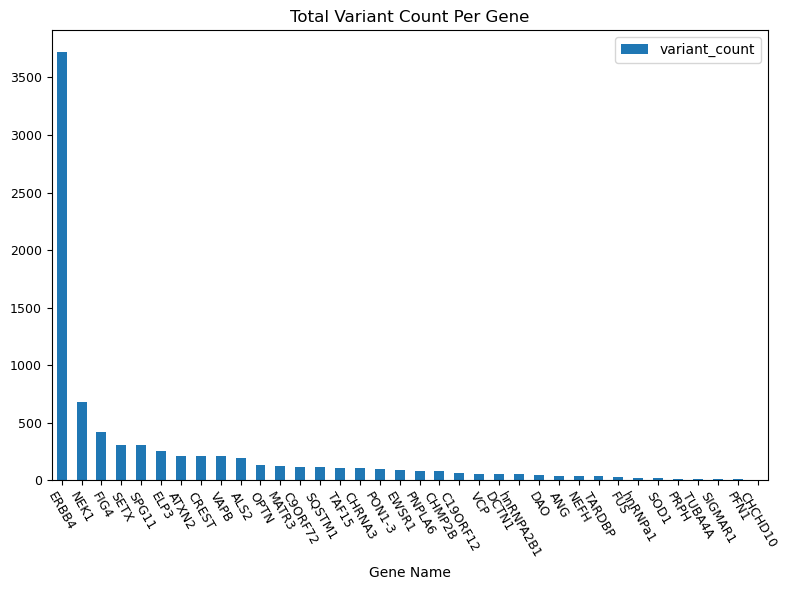

In [30]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [31]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SETX', 'SPG11']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [32]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [33]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [34]:
hdf.reset_index(inplace=True)

In [35]:
hdf.head()

,index,count
0,NA18605,892
1,NA18573,1348
2,NA18627,1191
3,NA18747,1006
4,NA18616,646


In [36]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(894.4607843137255), 211.92108897383005)

## Find top and bottom genomes using mean & STD

In [37]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [38]:
len(top_genomes)

20

In [39]:
len(bottom_genomes)

20

In [40]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [41]:
sdf.head()

,NA18605,NA18573,NA18627,NA18747,NA18616,NA18596,NA18552,NA18648,NA18626,NA18619,...,NA18544,NA18537,NA18640,NA18618,NA18595,NA18633,NA18643,NA18535,NA18558,NA18647
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,7,20,21,24,4,2,16,8,22,2,...,23,23,3,9,6,22,3,21,5,1
ANG,0,0,5,13,1,1,6,5,0,2,...,1,0,0,5,1,0,1,0,1,1
ATXN2,7,7,5,3,3,6,9,8,7,2,...,1,6,22,4,6,1,7,9,10,4
C19ORF12,10,10,5,4,6,9,16,13,1,6,...,13,15,11,8,5,12,10,9,4,8
C9ORF72,1,34,15,23,12,9,3,10,12,13,...,13,11,35,14,4,14,22,15,11,1


In [42]:
tgdf= sdf.loc[top_genes]

In [43]:
tgdf_top_genomes = tgdf[top_genomes]

In [44]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [45]:
tgdf_top_genomes.head()

,NA18573,NA18627,NA18648,NA18612,NA18609,NA18553,NA18645,NA18634,NA18560,NA18547,NA18557,NA18536,NA18617,NA18546,NA18526,NA18745,NA18548,NA18637,NA18558,NA18647
gene,,,,,,,,,,,,,,,,,,,,
ERBB4,688,550,612,634,624,523,519,626,755,564,755,606,637,710,732,549,588,546,723,573
NEK1,181,189,208,190,187,189,191,193,7,208,11,4,190,46,213,185,188,191,211,185
FIG4,48,64,47,43,47,53,73,41,5,61,3,71,44,36,43,45,11,45,56,90
SETX,90,58,64,62,46,54,54,21,41,50,52,22,24,7,87,8,50,7,7,28
SPG11,5,92,94,4,92,60,95,59,95,52,80,94,2,85,93,92,2,94,95,3


In [46]:
tgdf_bot_genomes.head()

,NA18616,NA18610,NA18635,NA18757,NA18615,NA18527,NA18531,NA18545,NA18599,NA18631,NA18550,NA18748,NA18629,NA18606,NA18549,NA18563,NA18622,NA18555,NA18537,NA18640
gene,,,,,,,,,,,,,,,,,,,,
ERBB4,209,275,425,251,262,180,221,324,125,167,239,298,278,207,296,305,338,122,195,168
NEK1,4,7,9,2,7,1,11,7,7,4,7,2,5,7,5,11,6,191,4,7
FIG4,14,45,39,43,53,40,27,68,61,58,46,52,51,41,59,34,58,46,70,44
SETX,24,45,49,28,64,38,25,8,54,27,68,50,23,9,78,7,27,71,52,75
SPG11,87,55,2,95,5,3,123,6,57,95,59,122,2,95,6,3,10,51,6,4


## Plot stacked bar chart for top genes & top genomes

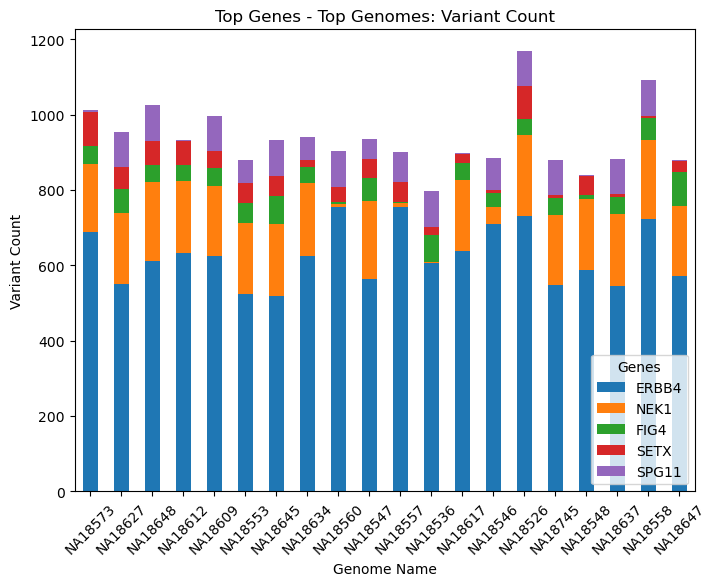

In [47]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

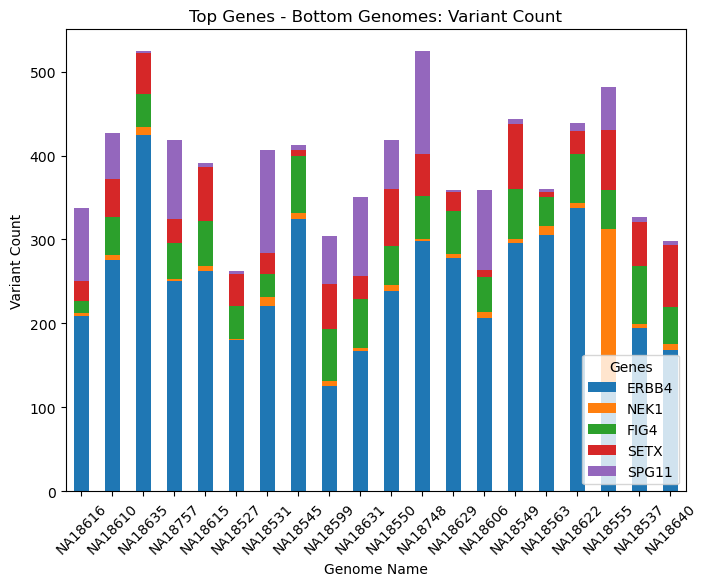

In [48]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()